**Proyek: Analisis Data Kepuasan Pelanggan**

**Latar Belakang:
Anda adalah seorang data analyst di sebuah perusahaan e-commerce. Tim produk ingin memahami kepuasan pelanggan tetapi tidak memiliki sumber daya untuk mensurvei seluruh basis pelanggan. Mereka meminta Anda untuk menganalisis dataset pelanggan dan membandingkan hasil dari berbagai teknik sampling.**

---

In [102]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

# Cek file 
print(os.listdir(path))

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\teejmahal20\airline-passenger-satisfaction\versions\1
['test.csv', 'train.csv']


In [103]:
file_path = os.path.join(path, 'train.csv')

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

airlines_satisfaction_df = pd.read_csv(file_path)

---

**TASK**


**1. Eksplorasi Data (Populasi):**

- Muat dataset ke dalam pandas DataFrame.
- Hitung statistik deskriptif untuk seluruh dataset (ini akan menjadi "parameter populasi" Anda). Fokus pada mean dari 'Rating Kepuasan' dan value_counts (proporsi) dari 'Tipe Pelanggan' (misalnya, Loyal vs. Disloyal).

In [105]:
# load dataset

airlines_satisfaction_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [106]:
airlines_satisfaction_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [107]:

print('=' * 50)
print(airlines_satisfaction_df['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


----

**2. Terapkan Teknik Sampling:**
Ambil sampel sebesar 20% dari populasi menggunakan empat metode berikut:

- Simple Random Sampling.
    - Systematic Sampling: Jangan lupa untuk mengacak data terlebih dahulu untuk menghindari bias!
    - Proportional Stratified Sampling: Lakukan stratifikasi berdasarkan 'Tipe Pelanggan'. Pastikan proporsi 'Tipe Pelanggan' dalam sampel Anda sama dengan di populasi.

- Cluster Sampling:
    - Anggap kolom 'Kelas' (misalnya, Eco, Business, Eco Plus) sebagai cluster Anda.
    - Pilih 2 dari 3 kelas secara acak.
    - Dari 2 kelas yang terpilih tersebut, ambil sampel acak sehingga total ukuran sampel mendekati 20% dari populasi asli.

***tahap pengambilan sampel***

In [ ]:
print("Populasi:", len(airlines_satisfaction_df))

# ambil sample size dari populasi sebesar 20%
sample_size = int(len(airlines_satisfaction_df) * 0.2)
print("Target Sampel 20%:", (sample_size))

print('=' * 50)

# 1 simple random sampling
###Systematic Sampling: Jangan lupa untuk mengacak data terlebih dahulu untuk menghindari bias!
# calculate interval
import random
interval = len(airlines_satisfaction_df) // sample_size
# print('interval', interval)
# titik awal random(metode ini digunakan untuk menghindari bias)
start_point = random.randint(0, interval - 1)
# print('start point', start_point)
#ambil data dengan interval
systematic_sample = airlines_satisfaction_df.iloc[start_point::interval]

print('systematic sample size:', len(systematic_sample))

print('=' * 50)


## Proportional Stratified Sampling 
# ( Lakukan stratifikasi berdasarkan 'Tipe Pelanggan'. Pastikan proporsi 'Tipe Pelanggan' dalam sampel Anda sama dengan di populasi.)

# Proportional Stratified Sampling (pakai frac)
strat_prop = airlines_satisfaction_df.groupby("Customer Type").sample(frac=0.2, random_state=None)
print("Proportional stratified Sampling:", len(strat_prop))
# cek proporsi hasil sampling
# print(strat_prop['Customer Type'].value_counts())
prop_pop = airlines_satisfaction_df['Customer Type'].value_counts(normalize=True)
prop_sample = strat_prop['Customer Type'].value_counts(normalize=True)

comparison = pd.DataFrame({
    "Populasi": prop_pop,
    "Sample": prop_sample
})

print(comparison)


print('=' * 50)

# 2. Cluster Sampling:
# Anggap kolom 'Kelas' (misalnya, Eco, Business, Eco Plus) sebagai cluster.
# Pilih 2 dari 3 kelas secara acak.
# cek unique cluster
clusters =  airlines_satisfaction_df['Class'].unique()
# print("Available clusters:", clusters)
# pilih 2 cluster secara acak
chosen_clusters = random.sample(list(clusters), 2)
# print("Chosen clusters:", chosen_clusters)
# filter data hanya untuk cluster yang terpilih
cluster_df = airlines_satisfaction_df[airlines_satisfaction_df['Class'].isin(chosen_clusters)]
# ambil sampel acak dari 2 kelas yang terpilih tersebut sehinggan total ukuran sampel mendekati 20% dari populasi.
cluster_sample = cluster_df.sample(n=sample_size, random_state=None)

print("Clustering Sampling:", len(cluster_sample))
print("Cluster terpilih:", chosen_clusters)
print(cluster_sample['Class'].value_counts(normalize=True))  # cek distribusi class

Populasi: 103904
Target Sampel 20%: 20780
systematic sample size: 20781
Proportional stratified Sampling: 20781
                   Populasi    Sample
Customer Type                        
Loyal Customer     0.817322  0.817333
disloyal Customer  0.182678  0.182667
Clustering Sampling: 20780
Cluster terpilih: ['Eco Plus', 'Business']
Class
Business    0.870115
Eco Plus    0.129885
Name: proportion, dtype: float64


----

**3. Bandingkan Hasil:**
- Untuk setiap sampel yang Anda buat, hitung mean dari 'Rating Kepuasan' dan value_counts dari 'Tipe Pelanggan'.
- Buat tabel atau visualisasi sederhana untuk membandingkan statistik dari keempat sampel Anda dengan statistik populasi asli.

In [112]:
# ---------------- systematic sampling analysis -----------------------------------
# print(systematic_sample['satisfaction'].unique())

mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# buat salinan DataFrame supaya aman
ss_df = systematic_sample.copy()

# buat kolom baru
ss_df['satisfaction_num'] = ss_df['satisfaction'].map(mapping)

# cek apakah ada nilai yang tidak ter-handle
if ss_df['satisfaction_num'].isna().any():
    print("Ada kategori tak terduga:", ss_df.loc[ss_df['satisfaction_num'].isna(), 'Rating Kepuasan'].unique())

# hitung mean
mean_rating = ss_df['satisfaction_num'].mean()
print("Mean Rating Kepuasan systematic_sample:", mean_rating)
# value counts customer type
print(ss_df['Customer Type'].value_counts())

print('=' * 50)
print('=' * 50)

# ---- proportional stratified sampling analysis ------------------------------------
mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# buat salinan DataFrame supaya aman
ps_df = strat_prop.copy()

# buat kolom baru
ps_df['satisfaction_num'] = ps_df['satisfaction'].map(mapping)

# cek apakah ada nilai yang tidak ter-handle
if ps_df['satisfaction_num'].isna().any():
    print("Ada kategori tak terduga:", ps_df.loc[ps_df['satisfaction_num'].isna(), 'Rating Kepuasan'].unique())

# hitung mean
mean_rating_ps = ps_df['satisfaction_num'].mean()
print("Mean Rating Kepuasan proportional stratified sampling:", mean_rating_ps)
# value counts customer type
print(ps_df['Customer Type'].value_counts())

print('=' * 50)
print('=' * 50)

# -------- Cluester sampling analysis ------------------------------------

mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# buat salinan DataFrame supaya aman
cls_df = cluster_sample.copy()

# buat kolom baru
cls_df['satisfaction_num'] = cls_df['satisfaction'].map(mapping)

# cek apakah ada nilai yang tidak ter-handle
if cls_df['satisfaction_num'].isna().any():
    print("Ada kategori tak terduga:", cls_df.loc[cls_df['satisfaction_num'].isna(), 'Rating Kepuasan'].unique())

# hitung mean
mean_rating_cs = cls_df['satisfaction_num'].mean()
print("Mean Rating Kepuasan Cluester sampling:", mean_rating_cs)
# value counts customer type
print(cls_df['Customer Type'].value_counts())

Mean Rating Kepuasan systematic_sample: 0.43453154323661036
Customer Type
Loyal Customer       16917
disloyal Customer     3864
Name: count, dtype: int64
Mean Rating Kepuasan proportional stratified sampling: 0.43631201578364853
Customer Type
Loyal Customer       16985
disloyal Customer     3796
Name: count, dtype: int64
Mean Rating Kepuasan Cluester sampling: 0.6321462945139558
Customer Type
Loyal Customer       17854
disloyal Customer     2926
Name: count, dtype: int64


In [122]:
# mapping untuk numerik
mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# kumpulkan data populasi + sampel
datasets = {
    "Populasi": airlines_satisfaction_df,
    "Systematic": systematic_sample,
    "Stratified": strat_prop,
    "Cluster": cluster_sample
}

# buat list untuk tabel
summary_list = []

for name, df in datasets.items():
    df_copy = df.copy()
    df_copy['satisfaction_num'] = df_copy['satisfaction'].map(mapping)
    
    mean_rating = df_copy['satisfaction_num'].mean()
    loyal_pct = df_copy['Customer Type'].value_counts(normalize=True).get('Loyal Customer', 0)
    disloyal_pct = df_copy['Customer Type'].value_counts(normalize=True).get('disloyal Customer', 0)
    
    summary_list.append({
        "Dataset": name,
        "Mean Rating Kepuasan": mean_rating,
        "% Prop Loyal Customer": loyal_pct,
        "% Prop Dist Cust": disloyal_pct
    })

# buat DataFrame ringkas
summary_df = pd.DataFrame(summary_list)
print(summary_df)


      Dataset  Mean Rating Kepuasan  % Prop Loyal Customer  % Prop Dist Cust
0    Populasi              0.433333               0.817322          0.182678
1  Systematic              0.434532               0.814061          0.185939
2  Stratified              0.436312               0.817333          0.182667
3     Cluster              0.632146               0.859192          0.140808


**Coclusion**

- Prop Stratified Sampling adalah pilihan terbaik jika ingin memastikan representasi yang akurat dari sub-kelompok penting dalam populasi.
- Systematic Sampling (dengan pengacakan) adalah alternatif yang efisien dan sering kali memberikan hasil yang sangat mendekati Simple Random Sampling(mean).
- Cluster Sampling bisa sangat efisien dari segi biaya dan waktu, tetapi membawa risiko bias yang signifikan jika cluster yang ada tidak mencerminkan keragaman populasi secara keseluruhan.

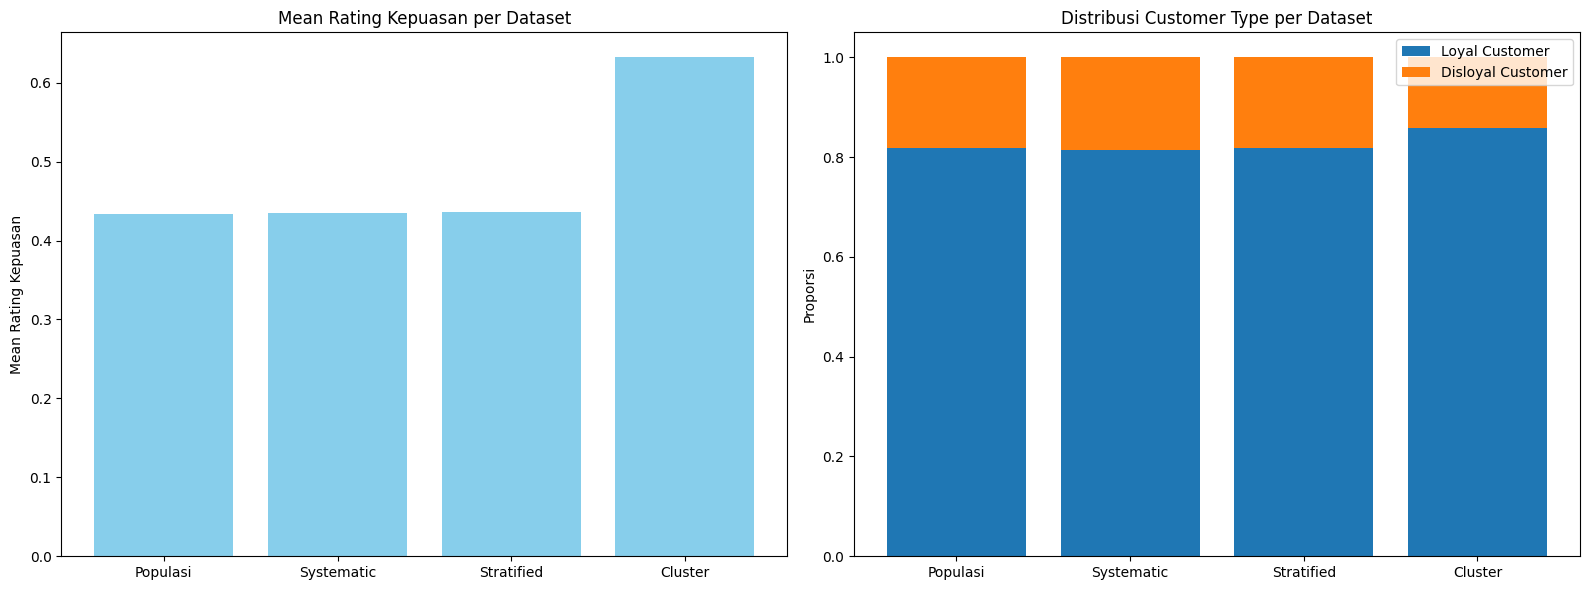

In [119]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16,6))  # 1 row, 2 columns
# Mean Rating Kepuasan

axes[0].bar(summary_df['Dataset'], summary_df['Mean Rating Kepuasan'], color='skyblue')
axes[0].set_title('Mean Rating Kepuasan per Dataset')
axes[0].set_ylabel('Mean Rating Kepuasan')

# Distribusi Customer Type

axes[1].bar(summary_df['Dataset'], summary_df['% Loyal Customer'], label='Loyal Customer')
axes[1].bar(summary_df['Dataset'], summary_df['% Disloyal Customer'], 
        bottom=summary_df['% Loyal Customer'], label='Disloyal Customer')
axes[1].set_title('Distribusi Customer Type per Dataset')
axes[1].set_ylabel('Proporsi')
axes[1].legend()

plt.tight_layout()
plt.show()
